<a href="https://colab.research.google.com/github/sanjithrana/AI-ML-TASKS/blob/main/AI_%26_ML_TASK_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [46]:
# linear_regression_task3.py
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [47]:
# 1. Import and preprocess the dataset

df = pd.read_csv("/content/Housing (1).csv")



In [48]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [49]:
categorical_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

In [50]:
# Handle 'furnishingstatus' (3 categories)
df = pd.get_dummies(df, columns=['furnishingstatus'], drop_first=True)


In [51]:
# Define features (X) and target (y)
X = df.drop('price', axis=1)
y = df['price']

# 2. Split data into train-test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [52]:


# 3. Fit Linear Regression models
# Simple Linear Regression
model_simple = LinearRegression()
model_simple.fit(X_train, y_train)


LinearRegression()

In [53]:



# Multiple Linear Regression
model_multi = LinearRegression()
model_multi.fit(X_train, y_train)

LinearRegression()

In [54]:


# 4. Evaluate models
y_pred_simple = model_simple.predict(X_test)
y_pred_multi = model_multi.predict(X_test)


In [55]:
# Metrics for Simple Regression
mae_simple = mean_absolute_error(y_test, y_pred_simple)
mse_simple = mean_squared_error(y_test, y_pred_simple)
r2_simple = r2_score(y_test, y_pred_simple)

In [56]:



# Metrics for Multiple Regression
mae_multi = mean_absolute_error(y_test, y_pred_multi)
mse_multi = mean_squared_error(y_test, y_pred_multi)
r2_multi = r2_score(y_test, y_pred_multi)




In [57]:

print("=== Simple Linear Regression ===")
print(f"MAE: {mae_simple:.4f}")
print(f"MSE: {mse_simple:.4f}")
print(f"R²:  {r2_simple:.4f}")
print(f"Coefficient (slope): {model_simple.coef_[0]:.4f}")
print(f"Intercept: {model_simple.intercept_:.4f}\n")

print("=== Multiple Linear Regression ===")
print(f"MAE: {mae_multi:.4f}")
print(f"MSE: {mse_multi:.4f}")
print(f"R²:  {r2_multi:.4f}")
print("Coefficients:")
for feature, coef in zip(df, model_multi.coef_):
    print(f"  {feature}: {coef:.4f}")

=== Simple Linear Regression ===
MAE: 970043.4039
MSE: 1754318687330.6638
R²:  0.6529
Coefficient (slope): 235.9688
Intercept: 260032.3576

=== Multiple Linear Regression ===
MAE: 970043.4039
MSE: 1754318687330.6638
R²:  0.6529
Coefficients:
  price: 235.9688
  area: 76778.7016
  bedrooms: 1094444.7861
  bathrooms: 407476.5950
  stories: 224841.9133
  parking: 367919.9477
  mainroad_yes: 231610.0372
  guestroom_yes: 390251.1762
  basement_yes: 684649.8853
  hotwaterheating_yes: 791426.7358
  airconditioning_yes: 629890.5653
  prefarea_yes: -126881.8176
  furnishingstatus_semi-furnished: -413645.0622


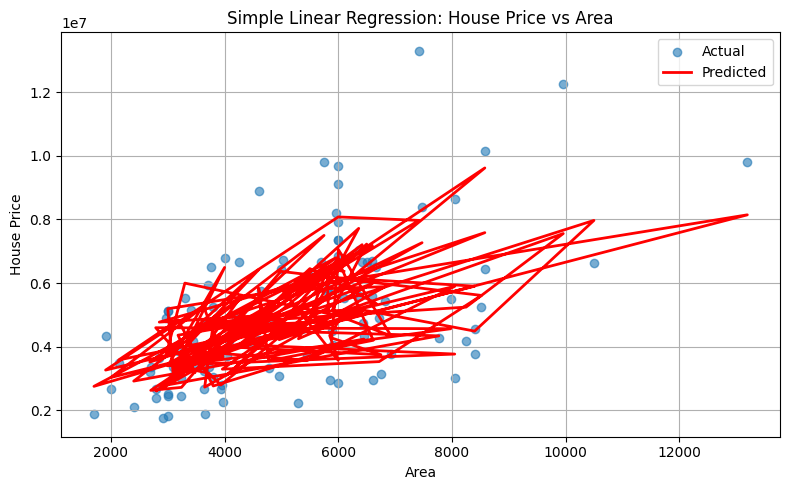

In [58]:
# 5. Plot regression line (for simple regression)
plt.figure(figsize=(8, 5))
plt.scatter(X_test['area'], y_test, alpha=0.6, label='Actual')
plt.plot(X_test['area'], y_pred_simple, color='red', linewidth=2, label='Predicted')
plt.xlabel('Area')
plt.ylabel('House Price')
plt.title('Simple Linear Regression: House Price vs Area')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('regression_plot.png')
plt.show()

# SIMPLE LINEAR REGRESSION (area vs price)

In [63]:
# Encode binary columns: 'yes' -> 1, 'no' -> 0
binary_cols = ['mainroad_yes', 'guestroom_yes', 'basement_yes', 'hotwaterheating_yes', 'airconditioning_yes', 'prefarea_yes']
for col in binary_cols:
    # Check if the column exists before mapping
    if col in df.columns:
        df[col] = df[col].map({'yes': 1, 'no': 0})

In [64]:
""
#Functions (No sklearn!)
def mean_absolute_error(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred))

def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

def r2_score(y_true, y_pred):
    ss_res = np.sum((y_true - y_pred) ** 2)
    ss_tot = np.sum((y_true - np.mean(y_true)) ** 2)
    return 1 - (ss_res / ss_tot)

In [65]:
X_simple = df['area'].values
y = df['price'].values

# Add bias term (intercept) → X becomes [1, x]
X_simple_with_bias = np.column_stack([np.ones(len(X_simple)), X_simple])


In [66]:
# Split into train/test (80-20)
np.random.seed(42)
indices = np.random.permutation(len(X_simple))
split = int(0.8 * len(indices))
train_idx, test_idx = indices[:split], indices[split:]

X_train_s = X_simple_with_bias[train_idx]
X_test_s = X_simple_with_bias[test_idx]
y_train_s = y[train_idx]
y_test_s = y[test_idx]

In [67]:
# Train: θ = (X^T X)^(-1) X^T y
theta_simple = np.linalg.inv(X_train_s.T @ X_train_s) @ X_train_s.T @ y_train_s

# Predict
y_pred_s = X_test_s @ theta_simple


In [68]:

# Evaluate
mae_s = mean_absolute_error(y_test_s, y_pred_s)
mse_s = mean_squared_error(y_test_s, y_pred_s)
r2_s = r2_score(y_test_s, y_pred_s)

print("=== SIMPLE LINEAR REGRESSION (from scratch) ===")
print(f"Intercept: {theta_simple[0]:.2f}")
print(f"Coefficient (area): {theta_simple[1]:.4f}")
print(f"MAE: {mae_s:.2f}")
print(f"MSE: {mse_s:.2f}")
print(f"R²:  {r2_s:.4f}\n")

=== SIMPLE LINEAR REGRESSION (from scratch) ===
Intercept: 2459555.48
Coefficient (area): 444.6991
MAE: 1118246.70
MSE: 2397962060298.94
R²:  0.3172



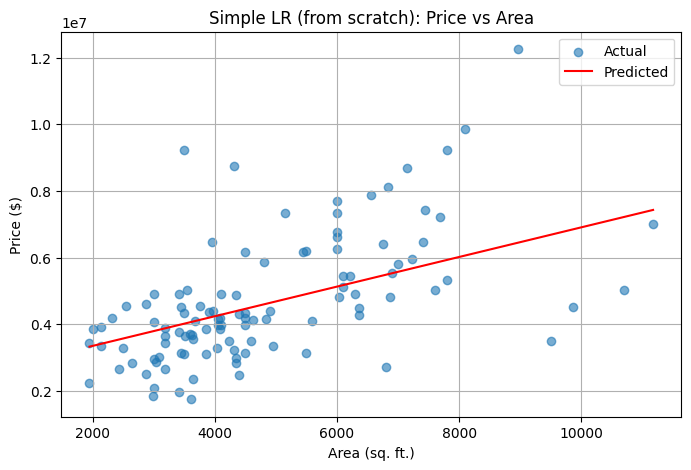

In [69]:

# Plot
plt.figure(figsize=(8, 5))
plt.scatter(X_test_s[:, 1], y_test_s, alpha=0.6, label='Actual')
# Sort for clean line
sorted_idx = np.argsort(X_test_s[:, 1])
plt.plot(X_test_s[sorted_idx, 1], y_pred_s[sorted_idx], color='red', label='Predicted')
plt.xlabel('Area (sq. ft.)')
plt.ylabel('Price ($)')
plt.title('Simple LR (from scratch): Price vs Area')
plt.legend()
plt.grid(True)
plt.savefig('simple_lr_scratch.png')
plt.show()

# MULTIPLE LINEAR REGRESSION (all features)

In [73]:
X_multi = df.drop('price', axis=1).astype(float).values
y_multi = y.copy()

# Add bias term (intercept column of 1s)
X_multi_with_bias = np.column_stack([np.ones(X_multi.shape[0]), X_multi])

In [74]:

# Split
X_train_m = X_multi_with_bias[train_idx]
X_test_m = X_multi_with_bias[test_idx]
y_train_m = y[train_idx]
y_test_m = y[test_idx]


In [75]:

# Train: θ = (X^T X)^(-1) X^T y
theta_multi = np.linalg.inv(X_train_m.T @ X_train_m) @ X_train_m.T @ y_train_m

# Predict
y_pred_m = X_test_m @ theta_multi

In [76]:
# Evaluate
mae_m = mean_absolute_error(y_test_m, y_pred_m)
mse_m = mean_squared_error(y_test_m, y_pred_m)
r2_m = r2_score(y_test_m, y_pred_m)

print("=== MULTIPLE LINEAR REGRESSION (from scratch) ===")
print(f"MAE: {mae_m:.2f}")
print(f"MSE: {mse_m:.2f}")
print(f"R²:  {r2_m:.4f}")


=== MULTIPLE LINEAR REGRESSION (from scratch) ===
MAE: nan
MSE: nan
R²:  nan


In [77]:
# Feature names for interpretation
feature_names = ['intercept'] + list(df.drop('price', axis=1).columns)
print("\nCoefficients:")
for name, coef in zip(feature_names, theta_multi):
    print(f"  {name}: {coef:.4f}")


Coefficients:
  intercept: nan
  area: nan
  bedrooms: nan
  bathrooms: nan
  stories: nan
  parking: nan
  mainroad_yes: nan
  guestroom_yes: nan
  basement_yes: nan
  hotwaterheating_yes: nan
  airconditioning_yes: nan
  prefarea_yes: nan
  furnishingstatus_semi-furnished: nan
  furnishingstatus_unfurnished: nan


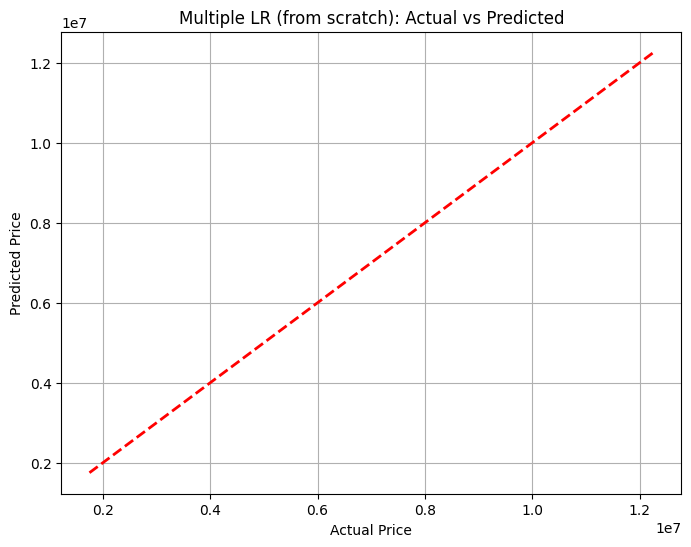

In [78]:
# Plot Actual vs Predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test_m, y_pred_m, alpha=0.6)
plt.plot([y_test_m.min(), y_test_m.max()], [y_test_m.min(), y_test_m.max()], 'r--', lw=2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Multiple LR (from scratch): Actual vs Predicted')
plt.grid(True)
plt.savefig('multiple_lr_scratch.png')
plt.show()